In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinic_mouse_df = pd.merge(clinical_data_df, mouse_data_df, how="left", on="Mouse ID")

# Display the data table for preview
clinic_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df = clinic_mouse_df.groupby(["Drug", "Timepoint"])


# Convert to DataFrame
mean_tumor_df = group_df["Tumor Volume (mm3)"].mean()
mean_tumor_df = mean_tumor_df.reset_index()


# Preview DataFrame
mean_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sterr = group_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sterr_df = tumor_sterr.reset_index()

# Preview DataFrame
tumor_sterr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# create drugs and timepoints
drugs = clinic_mouse_df.sort_values("Drug")["Drug"].unique()
timepoint = [x for x in np.arange(0, 50, step=5)]


# Minor Data Munging to Re-Format the Data Frames

# grab all drugs by timepoint for each time in timepoint and transpose the column
tumor_times = [mean_tumor_df.iloc[[x for x in np.arange(i, len(mean_tumor_df), step=10)], [0,2]]
             for i in range(0, len(drugs))]
tumor_times = [item.set_index("Drug").T for item in tumor_times]


# append all rows to single DataFrame
tumor_summary_df = tumor_times[0]
for i in range(1, len(tumor_times)): 
    tumor_summary_df = tumor_summary_df.append(tumor_times[i])


# create Timepoint index
tumor_summary_df["Timepoint"] = timepoint
tumor_summary_df = tumor_summary_df.set_index("Timepoint")


# Preview DataFrame
tumor_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


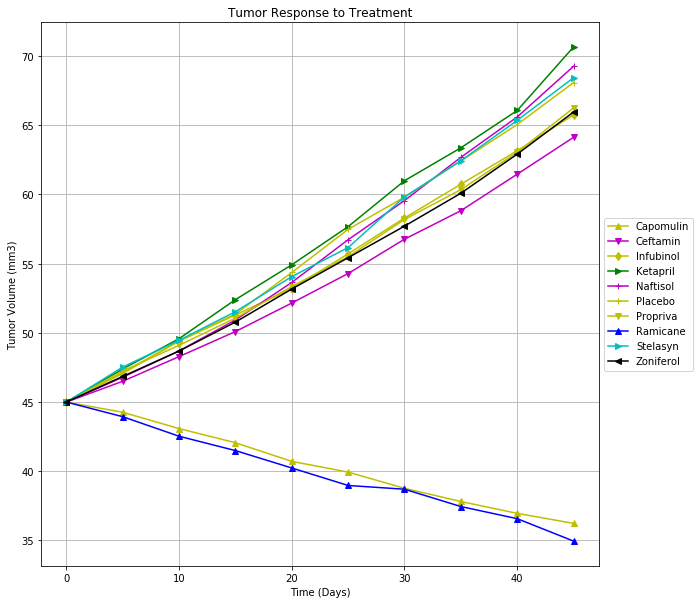

In [6]:
mkrs = ["o", "^", "s", "d", "x", "+", "*", "v", "<", ">"]
clrs = ["r", "b", "g", "k" , "c", "m", "y"]

# set figsize
plt.figure(figsize=(10, 10))

# plt.plot(timepoint, tumor_summary_df["Capomulin"], marker="o", color="r", label="Capomulin")
# plt.plot(timepoint, tumor_summary_df["Infubinol"], marker="^", color="b", label="Infubinol")
# plt.plot(timepoint, tumor_summary_df["Ketapril"], marker="s", color="g", label="Ketapril")
# plt.plot(timepoint, tumor_summary_df["Placebo"], marker ="d", color="k", label="Placebo")

# Generate the Plot (with Error Bars)
# plot tumor response for all drugs
for drug in drugs:
    plt.plot(timepoint, tumor_summary_df[drug], color=random.choice(clrs), marker=random.choice(mkrs), label=drug)

# set title and x,y labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# set legend
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))


# set grid
plt.grid()


# Save the Figure
# plt.savefig("tumor_response.png")


# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_sites = group_df["Metastatic Sites"].mean()


# Convert to DataFrame
meta_sites_df = mean_meta_sites.to_frame()


# Preview DataFrame
meta_sites_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sterr = group_df["Metastatic Sites"].sem()


# Convert to DataFrame
meta_sterr_df = meta_sterr.to_frame()


# Preview DataFrame
meta_sterr_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

# grab metastatic sites per timepoint for each time in timepoint and transpose the column
meta_times = [meta_sterr_df.iloc[[x for x in np.arange(i, len(meta_sterr_df), step=10)]] 
                  for i in range(len(drugs))]
meta_times = [item.reset_index().drop("Timepoint", axis=1).set_index("Drug").T for item in meta_times]

# append all rows to single DataFrame
meta_summary_df = meta_times[0]
for i in range(1, len(meta_times)):
    meta_summary_df = meta_summary_df.append(meta_times[i])

# create Timepoint index
meta_summary_df["Timepoint"] = timepoint
meta_summary_df = meta_summary_df.set_index("Timepoint")

# preview DataFrame
meta_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


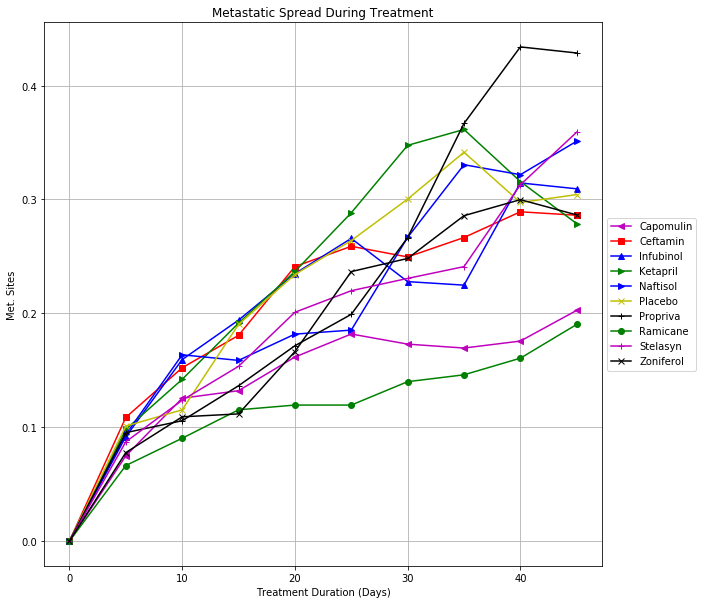

In [10]:
# set figsize
plt.figure(figsize=(10,10))



# plt.plot(x_axis, meta_summary_df["Capomulin"], color="r", marker="o", label="Capomulin")
# plt.plot(x_axis, meta_summary_df["Infubinol"], color="b", marker="^", label="Infubinol")
# plt.plot(x_axis, meta_summary_df["Ketapril"], color="g", marker="s", label="Ketapril")
# plt.plot(x_axis, meta_summary_df["Placebo"], color="k", marker="d", label="Placebo")



# Generate the Plot (with Error Bars)
# plot metastatic spread for all drugs
for drug in drugs:
    plt.plot(timepoint, meta_summary_df[drug], color=random.choice(clrs), marker=random.choice(mkrs), label=drug)


# set title and labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")


# create and place legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


# set grid
plt.grid()


# save figure
# plt.savefig("meta_spread.png")


# show figure
plt.show()


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = group_df["Mouse ID"].count()


# Convert to DataFrame
mouse_count_df = mouse_count.reset_index()


# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# grab all drugs by mouse count for each time in timepoint and transpose the rows
mouse_times = [mouse_count_df.iloc[[x for x in np.arange(i, len(mouse_count_df), step=10)], [0,2]]
                   for i in range(len(drugs))]
mouse_times = [item.set_index("Drug").T for item in mouse_times]


# append all times to a single DataFrame
mouse_summary_df = mouse_times[0]
for i in range(1, len(mouse_times)):
    mouse_summary_df = mouse_summary_df.append(mouse_times[i])


# create Timepoint index
mouse_summary_df["Timepoint"] = timepoint
mouse_summary_df = mouse_summary_df.set_index("Timepoint")


# preview the DataFrame
mouse_summary_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


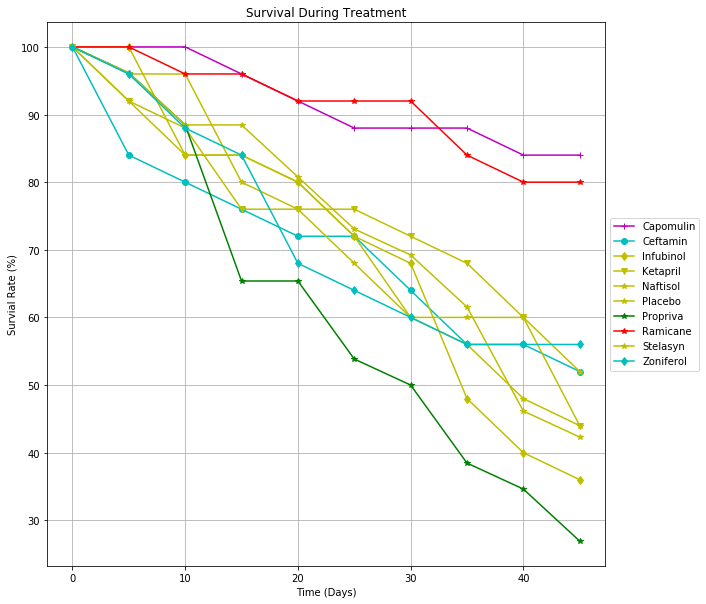

In [13]:
# set figure size
plt.figure(figsize=(10, 10))



# plt.plot(timepoint, mouse_summary_df["Capomulin"] / mouse_summary_df["Capomulin"][0] *100, 
#          color="r", marker= "o", label="Capomulin")
# plt.plot(timepoint, mouse_summary_df["Infubinol"] / mouse_summary_df["Infubinol"][0] *100, 
#          color="b", marker= "^", label="Infubinol")
# plt.plot(timepoint, mouse_summary_df["Ketapril"] / mouse_summary_df["Ketapril"][0] *100, 
#          color="g", marker= "s", label="Ketapril")
# plt.plot(timepoint, mouse_summary_df["Placebo"] / mouse_summary_df["Placebo"][0] *100, 
#          color="k", marker= "d", label="Placebo")



# Generate the Plot (with Error Bars)
# plot mouse survival for all drugs
for drug in drugs:
    survive =  mouse_summary_df[drug] / mouse_summary_df[drug][0] *100
    plt.plot(timepoint, survive, color=random.choice(clrs), marker=random.choice(mkrs), label=drug)


# create title and x,y labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survial Rate (%)")


# create legend
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))


# set grid
plt.grid()


# save figure
# plt.savefig("treatment_survival.png")


# show figure
plt.show()


## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_change_df = pd.DataFrame({
    "Drug" : drugs,
    "% Change" : [(tumor_summary_df[drug][45] - tumor_summary_df[drug][0]) / tumor_summary_df[drug][0] *100 
                  for drug in drugs]
}).set_index("Drug")


# Display the data to confirm
percent_change_df


,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


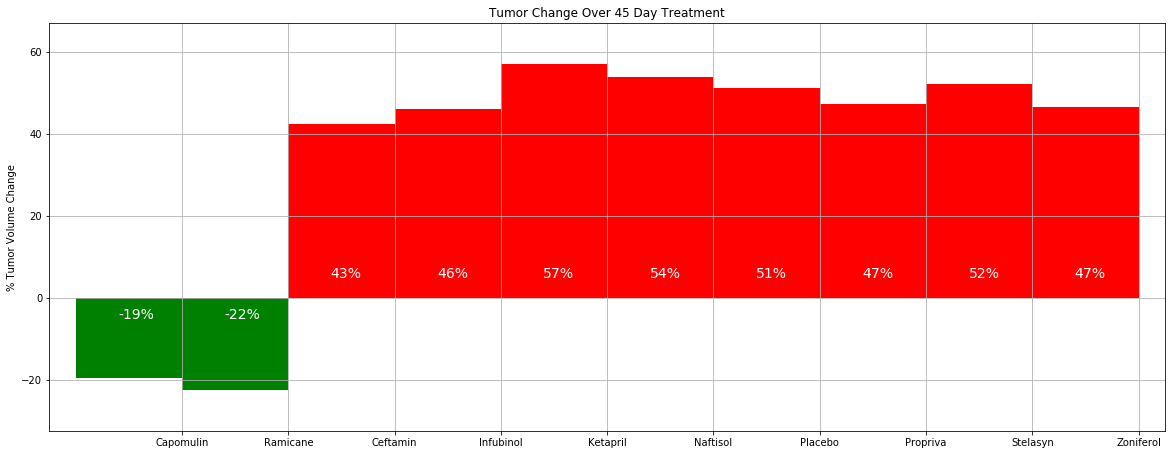

In [15]:
# sort positive and negative tumor growth changes per drug
pos_change = percent_change_df.loc[percent_change_df["% Change"] < 0]
neg_change = percent_change_df.loc[percent_change_df["% Change"] >= 0]

# create figure and set figsize
fig = plt.figure(figsize=(20, 7.5))
ax = plt.subplot(111)


# separate and plot positive and negative growths
pos_bar = ax.bar(np.arange(0, len(pos_change)), pos_change["% Change"], width=1, color="g", align="edge")
neg_bar = ax.bar(np.arange(len(pos_change), len(pos_change)+len(neg_change), step=1), neg_change["% Change"], 
            width=1, color="r", align="edge")


# add labels, tickmarks, grid
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

x_axis = np.arange(0, len(drugs), step=1)
plt.xticks(x_axis +1, pos_change.index.append(neg_change.index))

plt.grid()


# label percentages
for bar in pos_bar:
    plt.text(bar.get_x() +0.4, -5, s="{}%".format(int(round(bar.get_height()))), color="w", fontsize=14)
for bar in neg_bar:
    plt.text(bar.get_x() +0.4, 5, s="{}%".format(int(round(bar.get_height()))), color="w", fontsize=14)

# set xlim and ylim

plt.xlim(-0.25, len(drugs)+0.25)
plt.ylim(min(pos_change["% Change"])-10, max(neg_change["% Change"])+10)


# save figure
# plt.savefig("tumor_change_over_time.png")


# show figure
fig.show()


## Conclusion

28


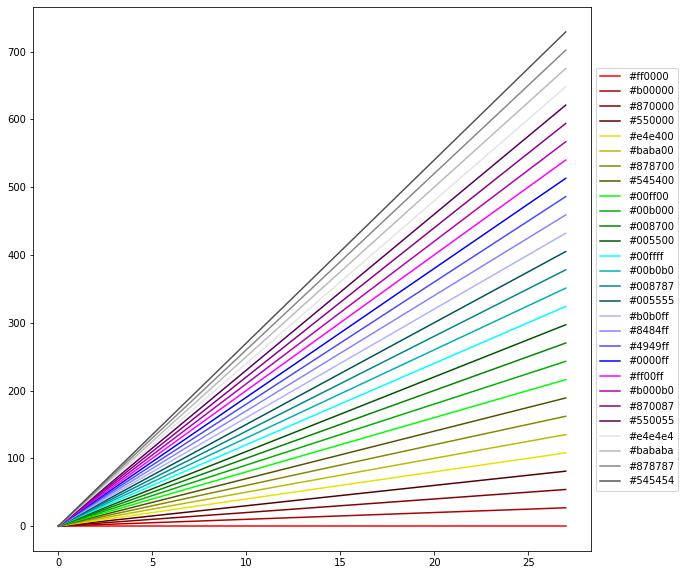

In [16]:
hex0 = [
# red
    "#ff0000",
    "#b00000",
    "#870000",
    "#550000",

# yellow
    "#e4e400",
    "#baba00",
    "#878700",
    "#545400",

# green
    "#00ff00",
    "#00b000",
    "#008700",
    "#005500",

# cyan
    "#00ffff",
    "#00b0b0",
    "#008787",
    "#005555",

# blue
    "#b0b0ff",
    "#8484ff",
    "#4949ff",
    "#0000ff",

# magenta
    "#ff00ff",
    "#b000b0",
    "#870087",
    "#550055",

# grey
    "#e4e4e4",
    "#bababa",
    "#878787",
    "#545454"
]

print(len(hex0))

plt.figure(figsize=(10,10))

x = np.arange(0, len(hex0), step=1)

for i in range(len(hex0)):
    plt.plot(x, x*i, color=hex0[i], label=hex0[i])

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    
plt.show()


24


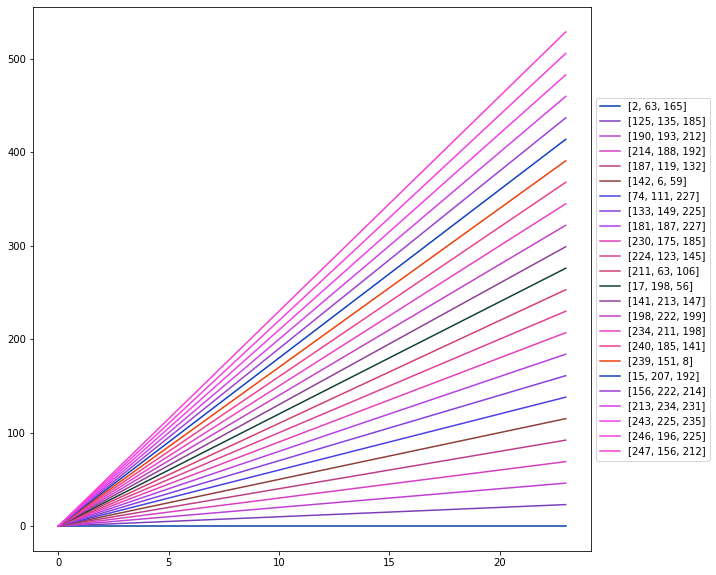

In [17]:
def rgb_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)


rgb = [
    [2,63,165],
    [125,135,185],
    [190,193,212],
    [214,188,192],
    [187,119,132],
    [142,6,59],
    [74,111,227],
    [133,149,225],
    [181,187,227],
    [230,175,185],
    [224,123,145],
    [211,63,106],
    [17,198,56],
    [141,213,147],
    [198,222,199],
    [234,211,198],
    [240,185,141],
    [239,151,8],
    [15,207,192],
    [156,222,214],
    [213,234,231],
    [243,225,235],
    [246,196,225],
    [247,156,212]
]

print(len(rgb))

plt.figure(figsize=(10,10))

x = np.arange(0, len(rgb), step=1)

for i in range(len(rgb)):
    plt.plot(x, x*i, color=rgb_to_hex(rgb[i][0], rgb[0][1], rgb[i][2]), label=rgb[i])

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


26


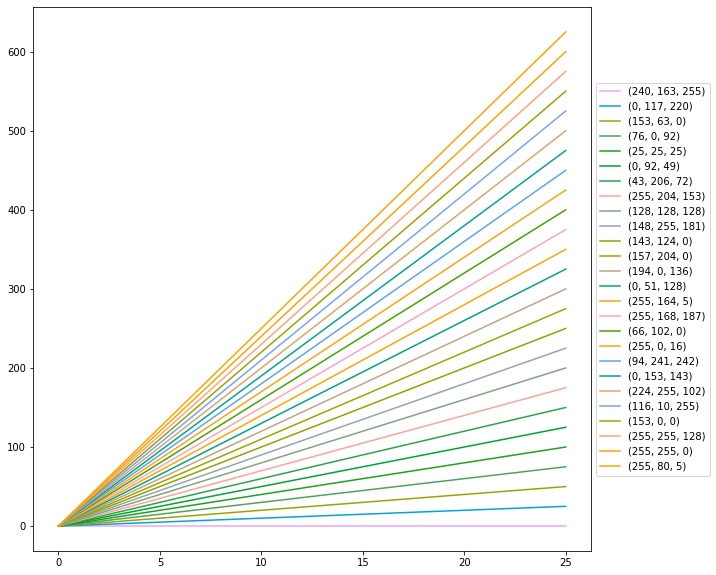

In [18]:
rgb2 = [(240,163,255),
(0,117,220),
(153,63,0),
(76,0,92),
(25,25,25),
(0,92,49),
(43,206,72),
(255,204,153),
(128,128,128),
(148,255,181),
(143,124,0),
(157,204,0),
(194,0,136),
(0,51,128),
(255,164,5),
(255,168,187),
(66,102,0),
(255,0,16),
(94,241,242),
(0,153,143),
(224,255,102),
(116,10,255),
(153,0,0),
(255,255,128),
(255,255,0),
(255,80,5)]


print(len(rgb2))

plt.figure(figsize=(10,10))

x = np.arange(0, len(rgb2), step=1)

for i in range(len(rgb2)):
    plt.plot(x, x*i, color=rgb_to_hex(rgb2[i][0], rgb2[0][1], rgb2[i][2]), label=rgb2[i])

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


269


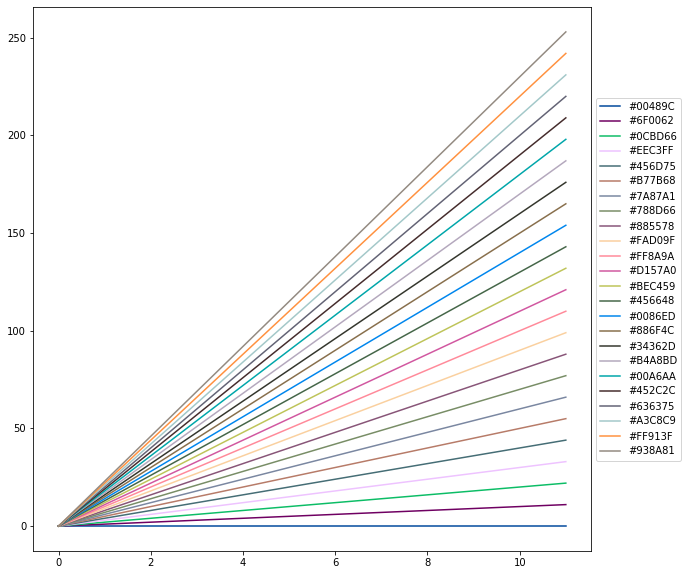

In [20]:
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

colorhex = [
        "#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",

        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
        "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
        "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
        "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
        "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
        
        "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
        "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
        "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
        "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
        "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
        "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
        "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
        "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58",
        
        "#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D",
        "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176",
        "#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5",
        "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4",
        "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01",
        "#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966",
        "#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0",
        "#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C",

        "#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868",
        "#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183",
        "#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433",
        "#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F",
        "#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E",
        "#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F",
        "#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00",
        "#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66",
        
        "#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25",
        "#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B"
]

print(len(colorhex))

subplot_no = 11

num_lines = len(colorhex) // subplot_no
split = list(divide_chunks(colorhex, num_lines))


plt.figure(figsize=(10,10))
x = np.arange(0, len(split), step=1)


j=2
for i in range(len(split[j])):
    plt.plot(x, x*i, color=split[j][i], label=split[j][i])


plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
